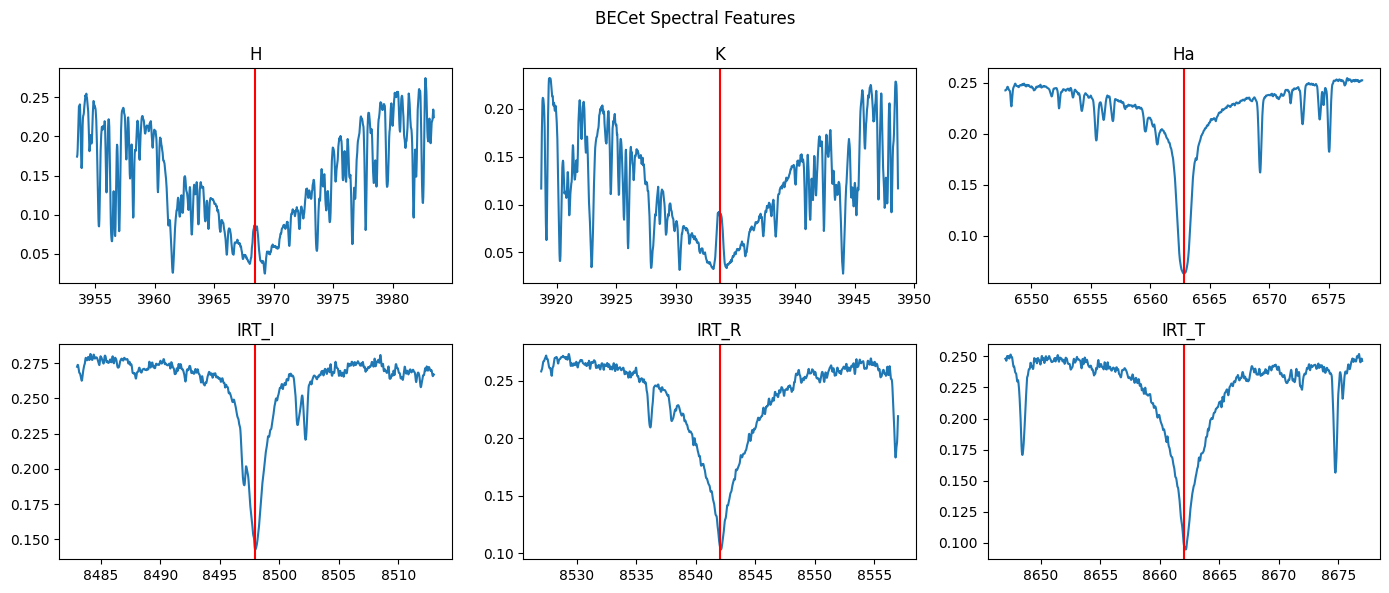

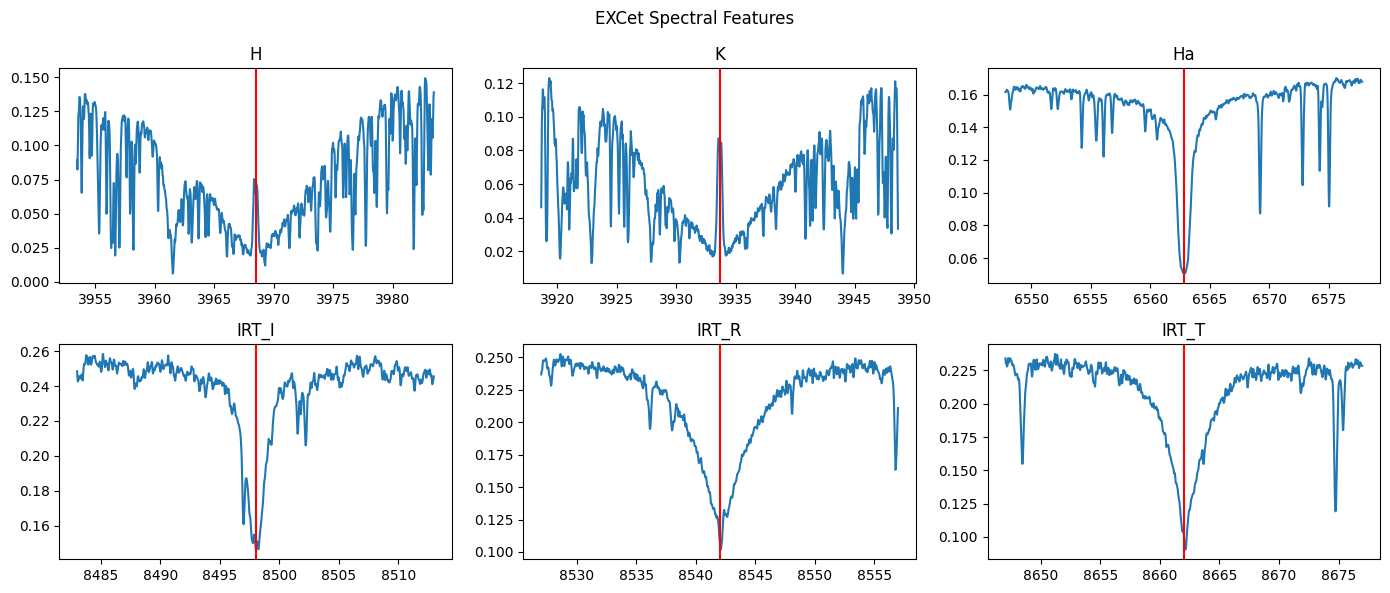

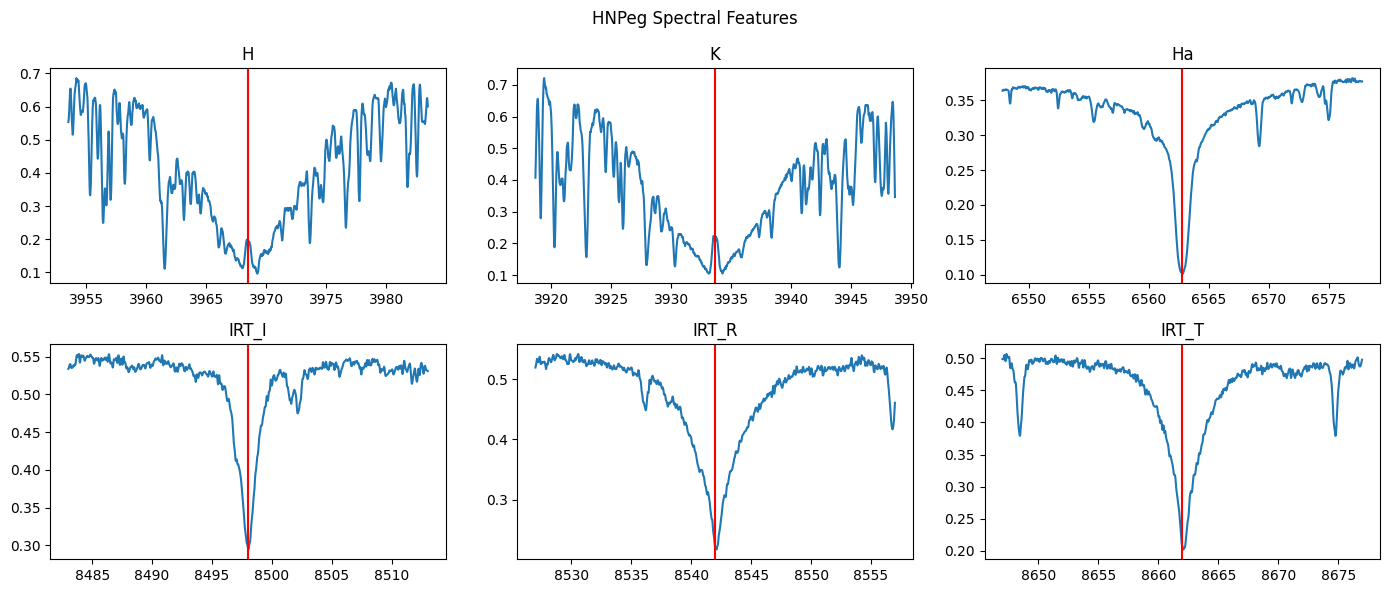

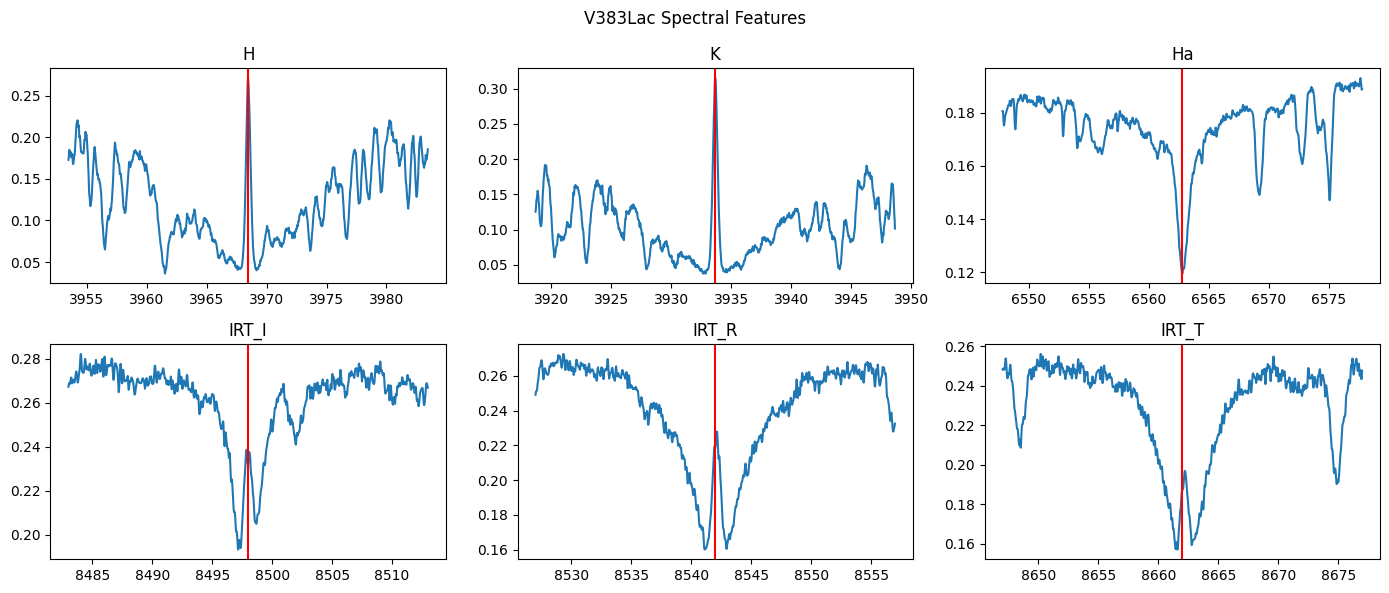

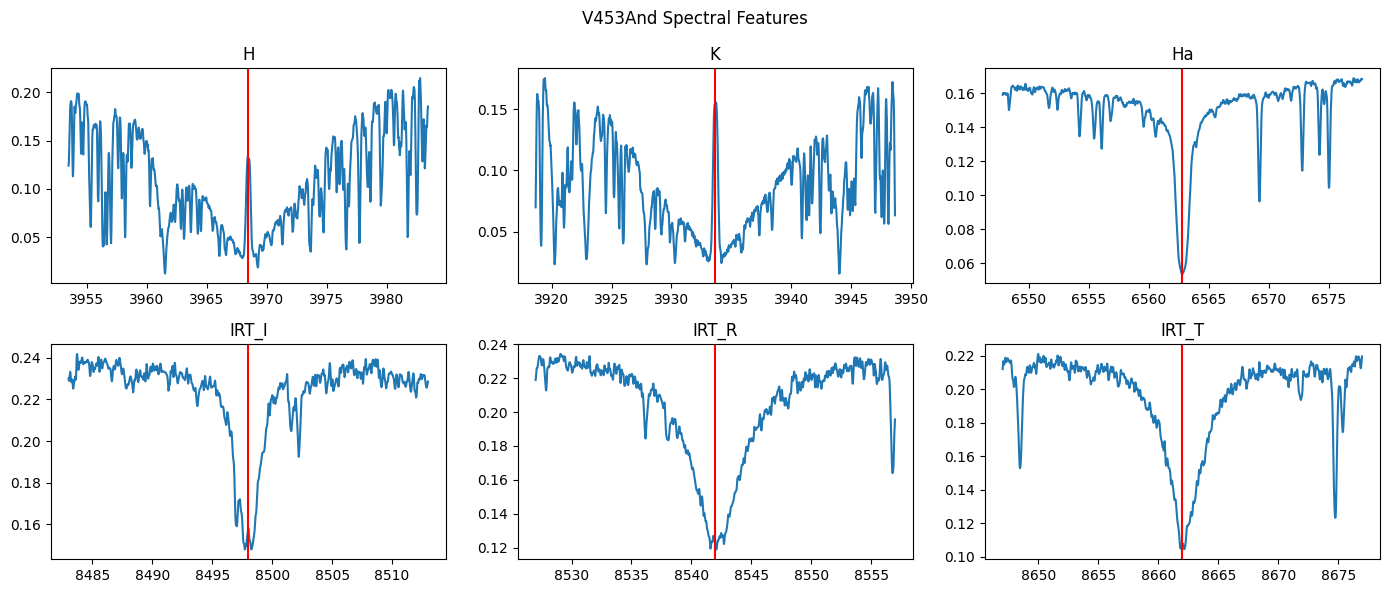

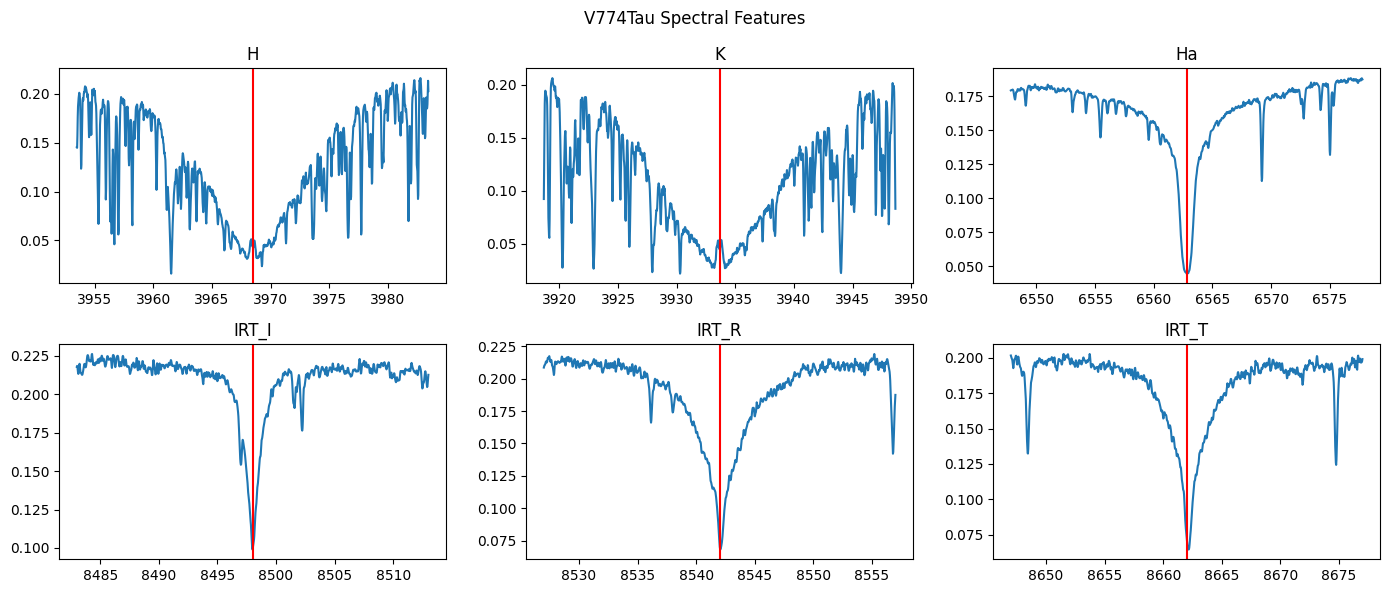

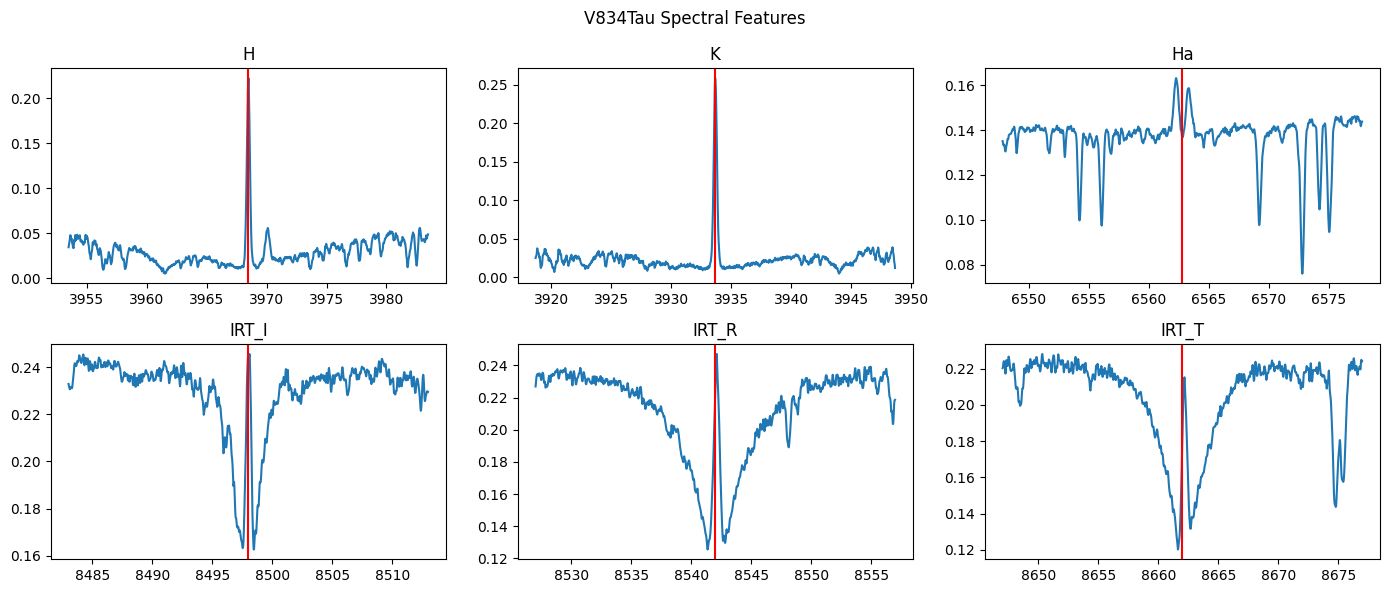

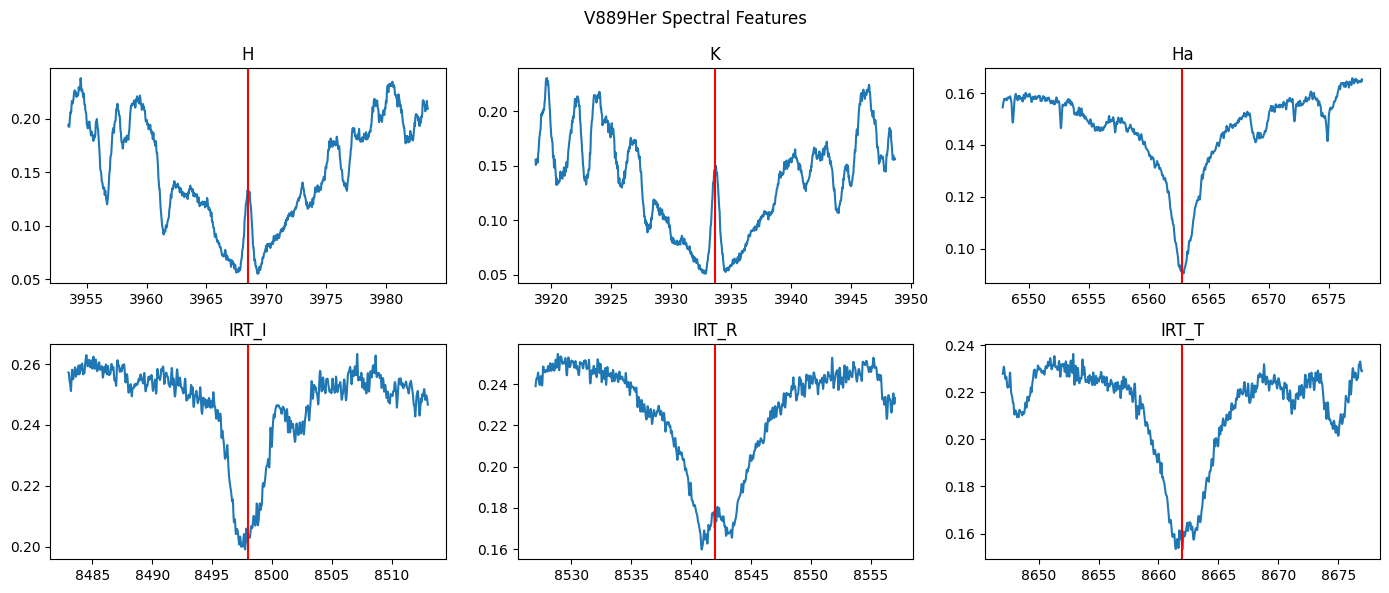

In [3]:
import numpy as np
from matplotlib import pyplot as plt

import paths
from spectroscopy.spectral_features import CaII_EMISSION_LINES

vrad_corrected_spectra = np.load(paths.VRAD_CORRECTED_FILE)

offsets = {}

for target, data in vrad_corrected_spectra.items():
    fig, axes = plt.subplots(2, 3, figsize=(14, 6))
    for ax, (line_name, w) in zip(axes.flatten(), CaII_EMISSION_LINES.items()):
        offset = offsets.get(target, 15)
        i = ((w-offset) < data[:, 0]) & (data[:, 0] < (w+offset))
        ax.plot(data[i, 0], data[i, 1])
        ax.axvline(w, color="red")
        ax.set(title=line_name)
    
    fig.suptitle(f"{target} Spectral Features")
    fig.tight_layout()
    plt.show()